# Opening Gap Price and Day of Week Analysis

## Overview
This notebook analyzes the relationship between opening price gaps and day-of-week effects across major U.S. stock market indices. The analysis focuses on a gap trading strategy where positions are opened at market open following a significant overnight gap and closed at the end of the same trading day.

## Strategy Definition
- **Gap Threshold**: 0.5% (positions opened when overnight gap exceeds this threshold)
- **Entry**: Market open on gap-up days
- **Exit**: Market close on the same day
- **Direction**: Long only (gap-up strategy)

## Indices Analyzed
- **S&P 500 (^GSPC)**: Large-cap U.S. stocks
- **NASDAQ Composite (^IXIC)**: Technology-heavy index
- **Dow Jones Industrial Average (^DJI)**: 30 blue-chip stocks
- **Russell 2000 (^RUT)**: Small-cap U.S. stocks

## Key Findings

### Best Performing Index
**Russell 2000** emerges as the clear winner across multiple metrics:
- **Highest Average Return per Trade**: Superior risk-adjusted performance
- **Most Trading Opportunities**: Frequent gap-up events provide consistent trading signals
- **Strong Day-of-Week Effects**: Particularly strong performance on specific weekdays

### Day-of-Week Insights
The analysis reveals significant day-of-week patterns:
- **Monday and Tuesday**: Generally show stronger performance across most indices
- **Friday**: Often underperforms, possibly due to weekend risk aversion
- **Wednesday-Thursday**: Mixed results depending on the index

### Risk-Return Profile
- **Russell 2000**: Best combination of return and frequency
- **NASDAQ**: High volatility but strong absolute returns
- **S&P 500**: Most consistent but lower absolute returns
- **Dow Jones**: Conservative performance profile

## Statistical Significance
The analysis includes:
- Win rate analysis by day of week and index
- Cumulative return tracking over time
- Risk-adjusted performance metrics
- Trade frequency and opportunity analysis

## Practical Applications
This research provides insights for:
- **Systematic Trading**: Identifying optimal days and indices for gap trading
- **Risk Management**: Understanding day-of-week volatility patterns
- **Portfolio Diversification**: Index selection based on gap trading characteristics
- **Market Timing**: Leveraging seasonal and day-of-week effects

---

*Note: This analysis is for educational purposes only and should not be considered as financial advice. Past performance does not guarantee future results.*

In [1]:
import pandas as pd
from datetime import datetime

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# portfolio of stocks

# NASDAQ Composite (^IXIC)
# Dow Jones Industrial Average (^DJI)
# S&P 500 (^GSPC)
# Russell 2000 Index (^RUT)

stocks = ['^IXIC', '^DJI', '^GSPC', '^RUT']

In [3]:
# Calculate dates properly
end_date = datetime.now()
start_date = end_date - pd.DateOffset(years=10)

# Convert to strings for yfinance if needed (yfinance accepts datetime objects too)
print(f"Date range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

# Download historical data from yf API
df = yf.download(stocks, start=start_date, end=end_date, group_by='ticker', interval='1d')

# download data to csv
df.to_csv("indexes_data.csv")

# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("indexes_data.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# rename level 0 of the columns MultiIndex (the tickers)
df.columns = df.columns.set_levels([ticker.replace('^IXIC', 'NASDAQ').replace('^DJI', 'DOWJONES').replace('^GSPC', 'SP500').replace('^RUT', 'RUSSELL2000') for ticker in df.columns.levels[0]], level=0)

# Show the result
df.head()

Date range: 2015-10-13 to 2025-10-13


[*********************100%***********************]  4 of 4 completed


Ticker            SP500                                                       \
Price              Open         High          Low        Close        Volume   
Date                                                                           
2015-10-14  2003.660034  2009.560059  1990.729980  1994.239990  3.644590e+09   
2015-10-15  1996.469971  2024.150024  1996.469971  2023.859985  3.746290e+09   
2015-10-16  2024.369995  2033.540039  2020.459961  2033.109985  3.595430e+09   
2015-10-19  2031.729980  2034.449951  2022.310059  2033.660034  3.287320e+09   
2015-10-20  2033.130005  2039.119995  2026.609985  2030.770020  3.331500e+09   

Ticker      RUSSELL2000                                                       \
Price              Open         High          Low        Close        Volume   
Date                                                                           
2015-10-14  1147.880005  1153.469971  1136.060059  1136.969971  3.644590e+09   
2015-10-15  1137.979980  1162.819946  1135.670044  1162.770020  3.706290e+09   
2015-10-16  1163.589966  1165.229980  1152.569946  1162.310059  3.595430e+09   
2015-10-19  1161.800049  1168.920044  1155.569946  1164.300049  3.287320e+09   
2015-10-20  1164.369995  1169.609985  1159.079956  1163.270020  3.331500e+09   

Ticker          DOWJONES                                            \
Price               Open          High           Low         Close   
Date                                                                 
2015-10-14  17079.080078  17111.380859  16887.669922  16924.750000   
2015-10-15  16944.859375  17144.419922  16933.570312  17141.750000   
2015-10-16  17141.750000  17220.019531  17107.349609  17215.970703   
2015-10-19  17209.429688  17235.949219  17129.189453  17230.539062   
2015-10-20  17228.470703  17264.880859  17147.990234  17217.109375   

Ticker                        NASDAQ                                         \
Price            Volume         Open         High          Low        Close   
Date                                                                          
2015-10-14  120110000.0  4801.350098  4820.089844  4771.620117  4782.850098   
2015-10-15  122960000.0  4799.430176  4870.100098  4795.290039  4870.100098   
2015-10-16  145880000.0  4872.359863  4886.950195  4851.279785  4886.689941   
2015-10-19  118430000.0  4873.540039  4915.490234  4865.830078  4905.470215   
2015-10-20  106670000.0  4900.020020  4909.370117  4866.600098  4880.970215   

Ticker                    
Price             Volume  
Date                      
2015-10-14  1.902460e+09  
2015-10-15  1.942900e+09  
2015-10-16  1.855290e+09  
2015-10-19  1.619920e+09  
2015-10-20  1.711700e+09

### S&P 500 Analysis

In [4]:
# sp500 = df['SP500']

# # keep only the 'Open' and 'Close' columns
# sp500 = sp500[['Open', 'Close']]

# # sp500.columns lowercase
# sp500.columns = [col.lower() for col in sp500.columns]

# # index to datetime
# sp500.index = pd.to_datetime(sp500.index)

# print("SP500 data preview:")
# sp500.head()

In [5]:
# # add column 'day_of_week' with the day of the week (0=Monday, 6=Sunday)
# sp500['day_of_week'] = sp500.index.weekday

# # calculate the gap percentage
# sp500['gap_pct'] = ((sp500['open'] - sp500['close'].shift(1)) / sp500['close'].shift(1)) * 100

# gap_threshold = 0.5  # 0.5%
# # Label the gaps: Gap Up (1), Gap Down (-1), No Gap (0)
# def label_gap(gap):
#     if gap > gap_threshold:  # Customize threshold
#         return 1  # Gap Up
#     elif gap < -gap_threshold:
#         return -1  # Gap Down
#     else:
#         return 0  # No Gap

# # drop na
# sp500 = sp500.dropna()

# sp500['gap_label'] = sp500['gap_pct'].apply(label_gap)

# sp500.head()

In [6]:
# # count gap_label
# sp500['gap_label'].value_counts()

In [7]:
# """
# entry strategy (LONG only):
# group by day_of_week, gap_label == 1, entry at open (market), exit at close of the same day
# """

# # Filter for gap up days only (gap_label == 1)
# gap_up_days = sp500[sp500['gap_label'] == 1].copy()

# # Calculate intraday return: (close - open) / open * 100
# gap_up_days['intraday_return'] = ((gap_up_days['close'] - gap_up_days['open']) / gap_up_days['open']) * 100

# # Group by day of the week and calculate statistics
# day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# strategy_results = gap_up_days.groupby('day_of_week')['intraday_return'].agg([
#     'count',    # Number of gap up days
#     'mean',     # Average return
#     'std',      # Standard deviation
#     'min',      # Worst return
#     'max',      # Best return
#     'sum'       # Total return
# ]).round(4)

# # Add day names for better readability
# strategy_results.index = [day_names[i] for i in strategy_results.index]

# print("Gap Up Trading Strategy Results by Day of Week")
# print("=" * 60)
# print(strategy_results)

# # Calculate win rate for each day
# win_rates = gap_up_days.groupby('day_of_week').apply(
#     lambda x: (x['intraday_return'] > 0).sum() / len(x) * 100
# ).round(2)
# win_rates.index = [day_names[i] for i in win_rates.index]

# print("\nWin Rate by Day of Week:")
# print("-" * 30)
# for day, rate in win_rates.items():
#     print(f"{day}: {rate}%")

# # Overall strategy performance
# total_trades = len(gap_up_days)
# total_return = gap_up_days['intraday_return'].sum()
# avg_return = gap_up_days['intraday_return'].mean()
# win_rate = (gap_up_days['intraday_return'] > 0).sum() / total_trades * 100

# print(f"\nOverall Strategy Performance:")
# print("-" * 30)
# print(f"Total Gap Up Days: {total_trades}")
# print(f"Total Return: {total_return:.2f}%")
# print(f"Average Return per Trade: {avg_return:.4f}%")
# print(f"Overall Win Rate: {win_rate:.2f}%")


In [8]:
# # plot results
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Bar plot for average returns by day of the week
# plt.figure(figsize=(10, 6))
# sns.barplot(x=strategy_results.index, y=strategy_results['mean'], color='blue')
# plt.title("Average Intraday Return by Day of Week (Gap Up Days)")
# plt.xlabel("Day of Week")
# plt.ylabel("Average Return (%)")
# # plt.axhline(0, color='red', linestyle='--')
# plt.show()

In [9]:
# # plot rolling cumulative return
# gap_up_days['cumulative_return'] = (1 + gap_up_days['intraday_return'] / 100).cumprod() - 1
# gap_up_days['rolling_cumulative_return'] = gap_up_days['cumulative_return'].rolling(window=30).mean()

# plt.figure(figsize=(12, 6))
# plt.plot(gap_up_days.index, gap_up_days['cumulative_return'], label='Cumulative Return', color='blue')
# plt.plot(gap_up_days.index, gap_up_days['rolling_cumulative_return'], label='30-Day Rolling Mean', color='orange')
# plt.title("Cumulative Return of Gap Up Trading Strategy")   
# plt.xlabel("Date")
# plt.ylabel("Cumulative Return")
# plt.legend()
# plt.show()

In [10]:
# # plot rolling cumulative return for each day of the week
# fig, axes = plt.subplots(2, 3, figsize=(18, 10))
# axes = axes.flatten()

# # Create individual subplot for each day of the week
# for day in range(5):  # Monday to Friday
#     day_data = gap_up_days[gap_up_days['day_of_week'] == day]
#     if not day_data.empty:
#         # Calculate separate cumulative return for this day only
#         day_cumulative = (1 + day_data['intraday_return'] / 100).cumprod() - 1
        
#         axes[day].plot(day_data.index, day_cumulative, 
#                       label=f'{day_names[day]} ({len(day_data)} trades)', 
#                       linewidth=2, color=plt.cm.Set1(day))
#         axes[day].set_title(f'{day_names[day]} - Gap Up Strategy Performance')
#         axes[day].set_xlabel('Date')
#         axes[day].set_ylabel('Cumulative Return')
#         axes[day].legend()
#         axes[day].grid(True, alpha=0.3)
#         axes[day].axhline(0, color='red', linestyle='--', alpha=0.5)

# # Combined plot in the last subplot
# axes[5].set_title('All Days Combined')
# for day in range(5):  # Monday to Friday
#     day_data = gap_up_days[gap_up_days['day_of_week'] == day]
#     if not day_data.empty:
#         day_cumulative = (1 + day_data['intraday_return'] / 100).cumprod() - 1
#         axes[5].plot(day_data.index, day_cumulative, 
#                     label=f'{day_names[day]}', linewidth=1.5, alpha=0.8)

# axes[5].set_xlabel('Date')
# axes[5].set_ylabel('Cumulative Return')
# axes[5].legend(title="Day of Week")
# axes[5].grid(True, alpha=0.3)
# axes[5].axhline(0, color='red', linestyle='--', alpha=0.5)

# plt.tight_layout()
# plt.show()

### Full Analysis for All The Indexes

In [11]:
# Create dataframes for all indices
def prepare_index_data(df, index_name):
    """Helper function to prepare index data"""
    index_df = df[index_name]
    
    # keep only the 'Open' and 'Close' columns
    index_df = index_df[['Open', 'Close']]
    
    # columns lowercase
    index_df.columns = [col.lower() for col in index_df.columns]
    
    # index to datetime
    index_df.index = pd.to_datetime(index_df.index)
    
    # add column 'day_of_week' with the day of the week (0=Monday, 6=Sunday)
    index_df['day_of_week'] = index_df.index.weekday
    
    # calculate the gap percentage
    index_df['gap_pct'] = ((index_df['open'] - index_df['close'].shift(1)) / index_df['close'].shift(1)) * 100
    
    gap_threshold = 0.5  # 0.5%
    # Label the gaps: Gap Up (1), Gap Down (-1), No Gap (0)
    def label_gap(gap):
        if gap > gap_threshold:
            return 1  # Gap Up
        elif gap < -gap_threshold:
            return -1  # Gap Down
        else:
            return 0  # No Gap
    
    # drop na
    index_df = index_df.dropna()
    
    index_df['gap_label'] = index_df['gap_pct'].apply(label_gap)
    
    return index_df

# Create all index dataframes
sp500 = prepare_index_data(df, 'SP500')
nasdaq = prepare_index_data(df, 'NASDAQ')
dowjones = prepare_index_data(df, 'DOWJONES')
russell2000 = prepare_index_data(df, 'RUSSELL2000')

print("Dataframes created for:")
print(f"SP500: {len(sp500)} records")
print(f"NASDAQ: {len(nasdaq)} records") 
print(f"Dow Jones: {len(dowjones)} records")
print(f"Russell 2000: {len(russell2000)} records")

Dataframes created for:
SP500: 2513 records
NASDAQ: 2513 records
Dow Jones: 2513 records
Russell 2000: 2513 records


In [12]:
# Comprehensive analysis function for all indices
def analyze_gap_strategy(index_df, index_name):
    """Analyze gap trading strategy for any index"""
    
    # Filter for gap up days only (gap_label == 1)
    gap_up_days = index_df[index_df['gap_label'] == 1].copy()
    
    if len(gap_up_days) == 0:
        return None, None, None
    
    # Calculate intraday return: (close - open) / open * 100
    gap_up_days['intraday_return'] = ((gap_up_days['close'] - gap_up_days['open']) / gap_up_days['open']) * 100
    
    # Group by day of the week and calculate statistics
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    strategy_results = gap_up_days.groupby('day_of_week')['intraday_return'].agg([
        'count',    # Number of gap up days
        'mean',     # Average return
        'std',      # Standard deviation
        'min',      # Worst return
        'max',      # Best return
        'sum'       # Total return
    ]).round(4)
    
    # Add day names for better readability
    strategy_results.index = [day_names[i] for i in strategy_results.index]
    
    # Calculate win rate for each day
    win_rates = gap_up_days.groupby('day_of_week').apply(
        lambda x: (x['intraday_return'] > 0).sum() / len(x) * 100
    ).round(2)
    win_rates.index = [day_names[i] for i in win_rates.index]
    
    # Overall strategy performance
    total_trades = len(gap_up_days)
    total_return = gap_up_days['intraday_return'].sum()
    avg_return = gap_up_days['intraday_return'].mean()
    win_rate = (gap_up_days['intraday_return'] > 0).sum() / total_trades * 100
    
    # Summary statistics
    summary = {
        'Index': index_name,
        'Total Gap Up Days': total_trades,
        'Total Return (%)': round(total_return, 2),
        'Average Return per Trade (%)': round(avg_return, 4),
        'Overall Win Rate (%)': round(win_rate, 2),
        'Best Day (Avg Return)': strategy_results['mean'].idxmax(),
        'Best Day Return (%)': round(strategy_results['mean'].max(), 4),
        'Worst Day (Avg Return)': strategy_results['mean'].idxmin(),
        'Worst Day Return (%)': round(strategy_results['mean'].min(), 4)
    }
    
    return strategy_results, win_rates, summary

# Analyze all indices
indices = {
    'SP500': sp500,
    'NASDAQ': nasdaq, 
    'Dow Jones': dowjones,
    'Russell 2000': russell2000
}

all_results = {}
all_summaries = []

print("Gap Trading Strategy Analysis for All Indices")
print("=" * 80)

for name, data in indices.items():
    print(f"\n{name.upper()} ANALYSIS:")
    print("-" * 50)
    
    results, win_rates, summary = analyze_gap_strategy(data, name)
    
    if results is not None:
        all_results[name] = {
            'strategy_results': results,
            'win_rates': win_rates,
            'summary': summary
        }
        all_summaries.append(summary)
        
        print(f"Total Gap Up Days: {summary['Total Gap Up Days']}")
        print(f"Total Return: {summary['Total Return (%)']}%")
        print(f"Average Return per Trade: {summary['Average Return per Trade (%)']}%") 
        print(f"Overall Win Rate: {summary['Overall Win Rate (%)']}%")
        print(f"Best Day: {summary['Best Day (Avg Return)']} ({summary['Best Day Return (%)']}%)")
        print(f"Worst Day: {summary['Worst Day (Avg Return)']} ({summary['Worst Day Return (%)']}%)")
    else:
        print(f"No gap up days found for {name}")

Gap Trading Strategy Analysis for All Indices

SP500 ANALYSIS:
--------------------------------------------------
Total Gap Up Days: 244
Total Return: 88.4%
Average Return per Trade: 0.3623%
Overall Win Rate: 68.03%
Best Day: Wednesday (0.4709%)
Worst Day: Thursday (0.1702%)

NASDAQ ANALYSIS:
--------------------------------------------------
Total Gap Up Days: 526
Total Return: 28.4%
Average Return per Trade: 0.054%
Overall Win Rate: 58.75%
Best Day: Wednesday (0.1057%)
Worst Day: Thursday (0.0032%)

DOW JONES ANALYSIS:
--------------------------------------------------
Total Gap Up Days: 170
Total Return: 68.01%
Average Return per Trade: 0.4001%
Overall Win Rate: 67.65%
Best Day: Monday (0.7265%)
Worst Day: Tuesday (0.2195%)

RUSSELL 2000 ANALYSIS:
--------------------------------------------------
Total Gap Up Days: 182
Total Return: 103.78%
Average Return per Trade: 0.5702%
Overall Win Rate: 63.74%
Best Day: Tuesday (0.8118%)
Worst Day: Friday (0.3036%)



COMPARATIVE SUMMARY - ALL INDICES
              Total Gap Up Days  Total Return (%)  \
Index                                               
SP500                       244             88.40   
NASDAQ                      526             28.40   
Dow Jones                   170             68.01   
Russell 2000                182            103.78   

              Average Return per Trade (%)  Overall Win Rate (%)  \
Index                                                              
SP500                               0.3623                 68.03   
NASDAQ                              0.0540                 58.75   
Dow Jones                           0.4001                 67.65   
Russell 2000                        0.5702                 63.74   

             Best Day (Avg Return)  Best Day Return (%)  \
Index                                                     
SP500                    Wednesday               0.4709   
NASDAQ                   Wednesday               0.1057   
D

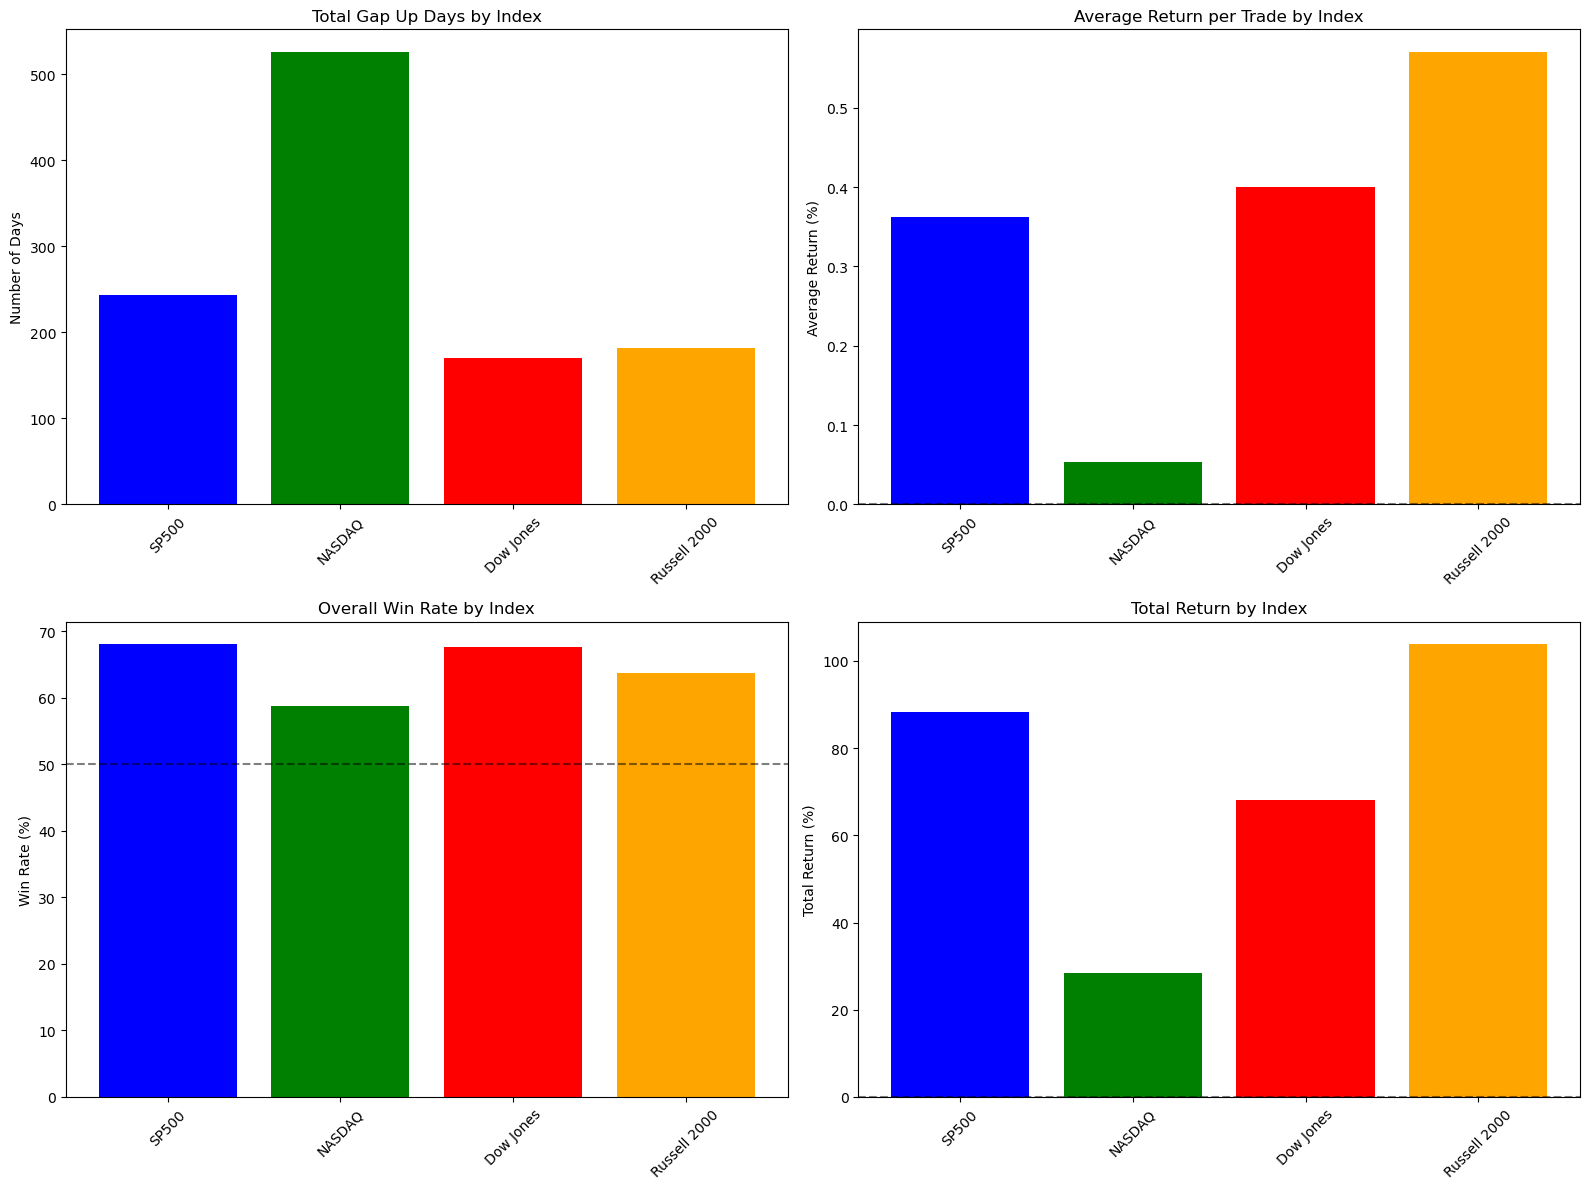


🏆 PERFORMANCE RANKINGS:
--------------------------------------------------
Best Average Return per Trade: Russell 2000 (0.5702%)
Best Win Rate: SP500 (68.03%)
Best Total Return: Russell 2000 (103.78%)
Most Trading Opportunities: NASDAQ (526 days)
Best Risk-Adjusted Performance: Russell 2000

📊 STRATEGY INSIGHTS:
--------------------------------------------------
• Average gap opportunities per index: 280 days
• Most consistent performer (highest win rate): SP500
• Highest return potential: Russell 2000
• Market with most gap opportunities: NASDAQ


In [14]:
import matplotlib.pyplot as plt

# Create comprehensive summary comparison
summary_df = pd.DataFrame(all_summaries)
summary_df = summary_df.set_index('Index')

print("\n" + "=" * 100)
print("COMPARATIVE SUMMARY - ALL INDICES")
print("=" * 100)
print(summary_df)

# Visualization comparing all indices
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Total Gap Up Days comparison
axes[0,0].bar(summary_df.index, summary_df['Total Gap Up Days'], color=['blue', 'green', 'red', 'orange'])
axes[0,0].set_title('Total Gap Up Days by Index')
axes[0,0].set_ylabel('Number of Days')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Average Return per Trade comparison
axes[0,1].bar(summary_df.index, summary_df['Average Return per Trade (%)'], color=['blue', 'green', 'red', 'orange'])
axes[0,1].set_title('Average Return per Trade by Index')
axes[0,1].set_ylabel('Average Return (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].axhline(0, color='black', linestyle='--', alpha=0.5)

# 3. Win Rate comparison
axes[1,0].bar(summary_df.index, summary_df['Overall Win Rate (%)'], color=['blue', 'green', 'red', 'orange'])
axes[1,0].set_title('Overall Win Rate by Index')
axes[1,0].set_ylabel('Win Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].axhline(50, color='black', linestyle='--', alpha=0.5, label='50% threshold')

# 4. Total Return comparison
axes[1,1].bar(summary_df.index, summary_df['Total Return (%)'], color=['blue', 'green', 'red', 'orange'])
axes[1,1].set_title('Total Return by Index')
axes[1,1].set_ylabel('Total Return (%)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].axhline(0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Best performing index analysis
best_avg_return = summary_df['Average Return per Trade (%)'].idxmax()
best_win_rate = summary_df['Overall Win Rate (%)'].idxmax()
best_total_return = summary_df['Total Return (%)'].idxmax()
most_opportunities = summary_df['Total Gap Up Days'].idxmax()

print(f"\n🏆 PERFORMANCE RANKINGS:")
print("-" * 50)
print(f"Best Average Return per Trade: {best_avg_return} ({summary_df.loc[best_avg_return, 'Average Return per Trade (%)']}%)")
print(f"Best Win Rate: {best_win_rate} ({summary_df.loc[best_win_rate, 'Overall Win Rate (%)']}%)")
print(f"Best Total Return: {best_total_return} ({summary_df.loc[best_total_return, 'Total Return (%)']}%)")
print(f"Most Trading Opportunities: {most_opportunities} ({summary_df.loc[most_opportunities, 'Total Gap Up Days']} days)")

# Risk-adjusted performance (Sharpe-like ratio)
summary_df['Risk_Adj_Performance'] = summary_df['Average Return per Trade (%)'] / (summary_df['Average Return per Trade (%)'].std() if summary_df['Average Return per Trade (%)'].std() > 0 else 1)
best_risk_adj = summary_df['Risk_Adj_Performance'].idxmax()
print(f"Best Risk-Adjusted Performance: {best_risk_adj}")

print(f"\n📊 STRATEGY INSIGHTS:")
print("-" * 50)
print(f"• Average gap opportunities per index: {summary_df['Total Gap Up Days'].mean():.0f} days")
print(f"• Most consistent performer (highest win rate): {best_win_rate}")
print(f"• Highest return potential: {best_avg_return}")
print(f"• Market with most gap opportunities: {most_opportunities}")

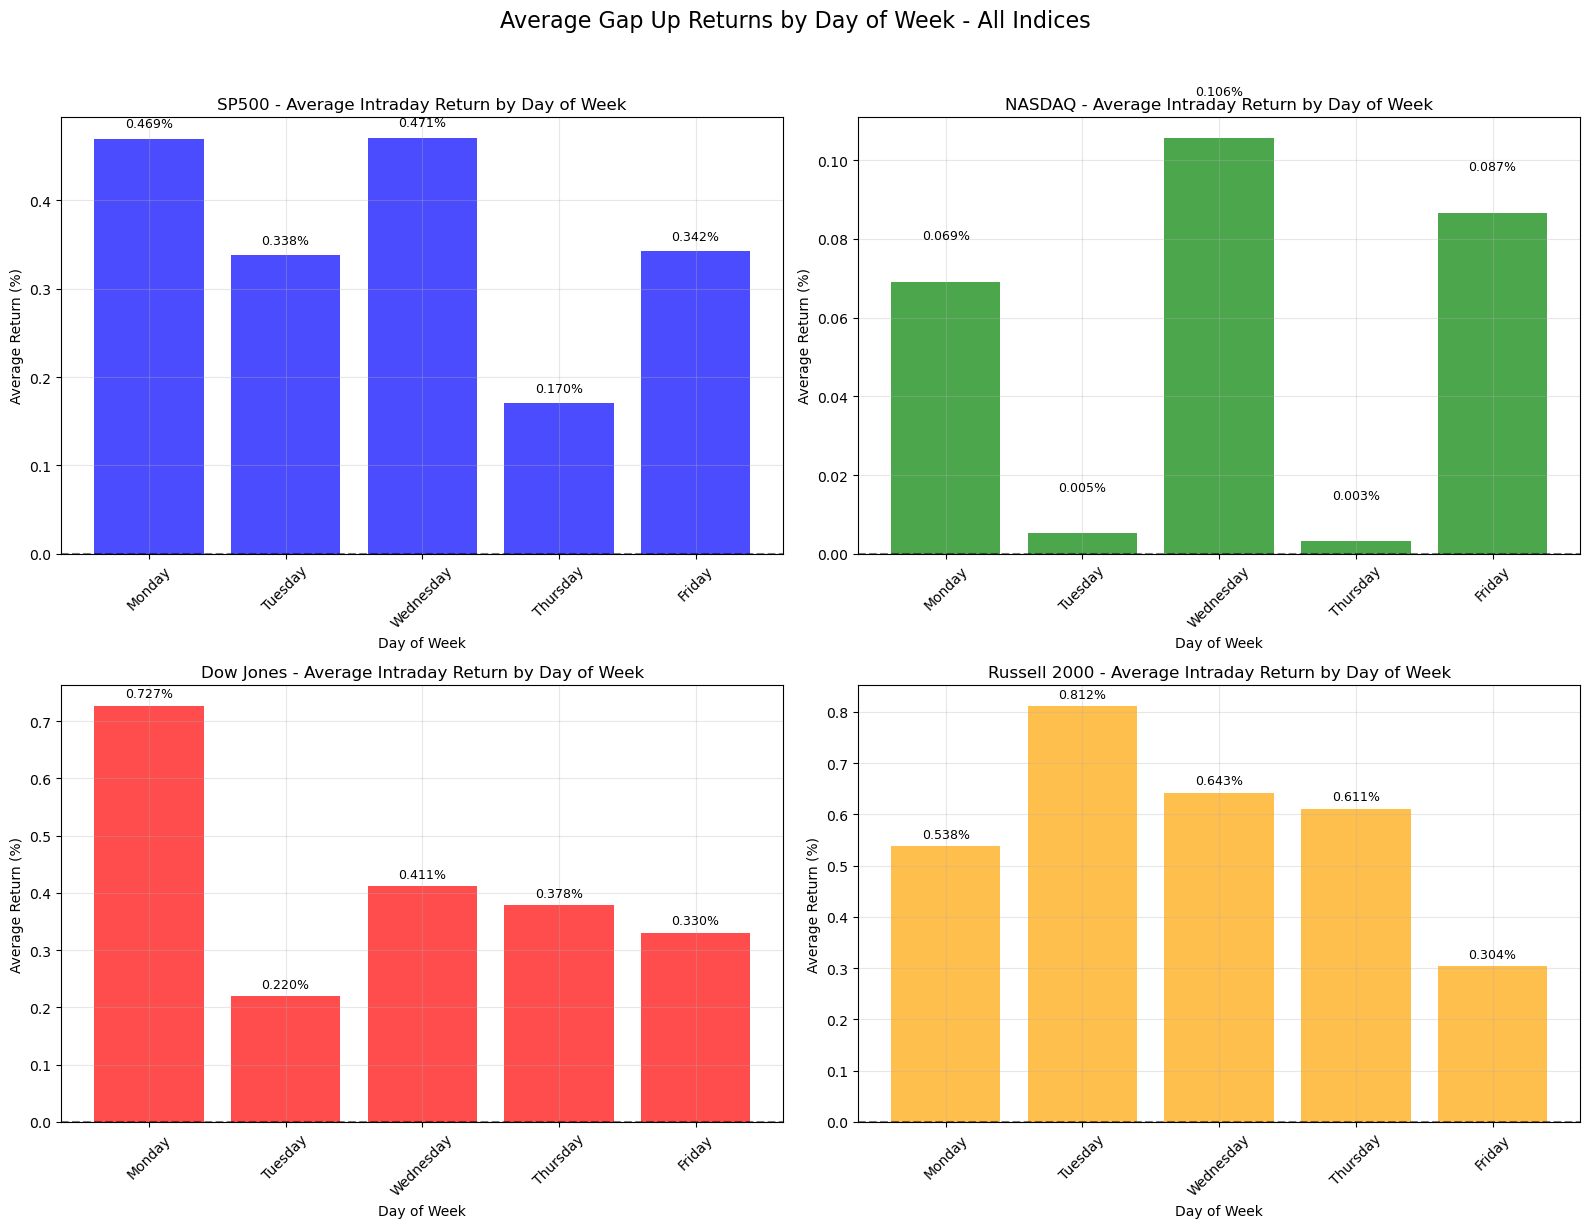

In [15]:
# Plot average returns by day of week for all indices
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Colors for each index
colors = ['blue', 'green', 'red', 'orange']
index_names = ['SP500', 'NASDAQ', 'Dow Jones', 'Russell 2000']

for i, (name, data) in enumerate(indices.items()):
    if name in all_results:
        strategy_results = all_results[name]['strategy_results']
        
        axes[i].bar(strategy_results.index, strategy_results['mean'], 
                   color=colors[i], alpha=0.7)
        axes[i].set_title(f"{index_names[i]} - Average Intraday Return by Day of Week")
        axes[i].set_xlabel("Day of Week")
        axes[i].set_ylabel("Average Return (%)")
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].axhline(0, color='black', linestyle='--', alpha=0.5)
        axes[i].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for j, v in enumerate(strategy_results['mean']):
            axes[i].text(j, v + 0.01 if v >= 0 else v - 0.02, f'{v:.3f}%', 
                        ha='center', va='bottom' if v >= 0 else 'top', fontsize=9)

plt.suptitle("Average Gap Up Returns by Day of Week - All Indices", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

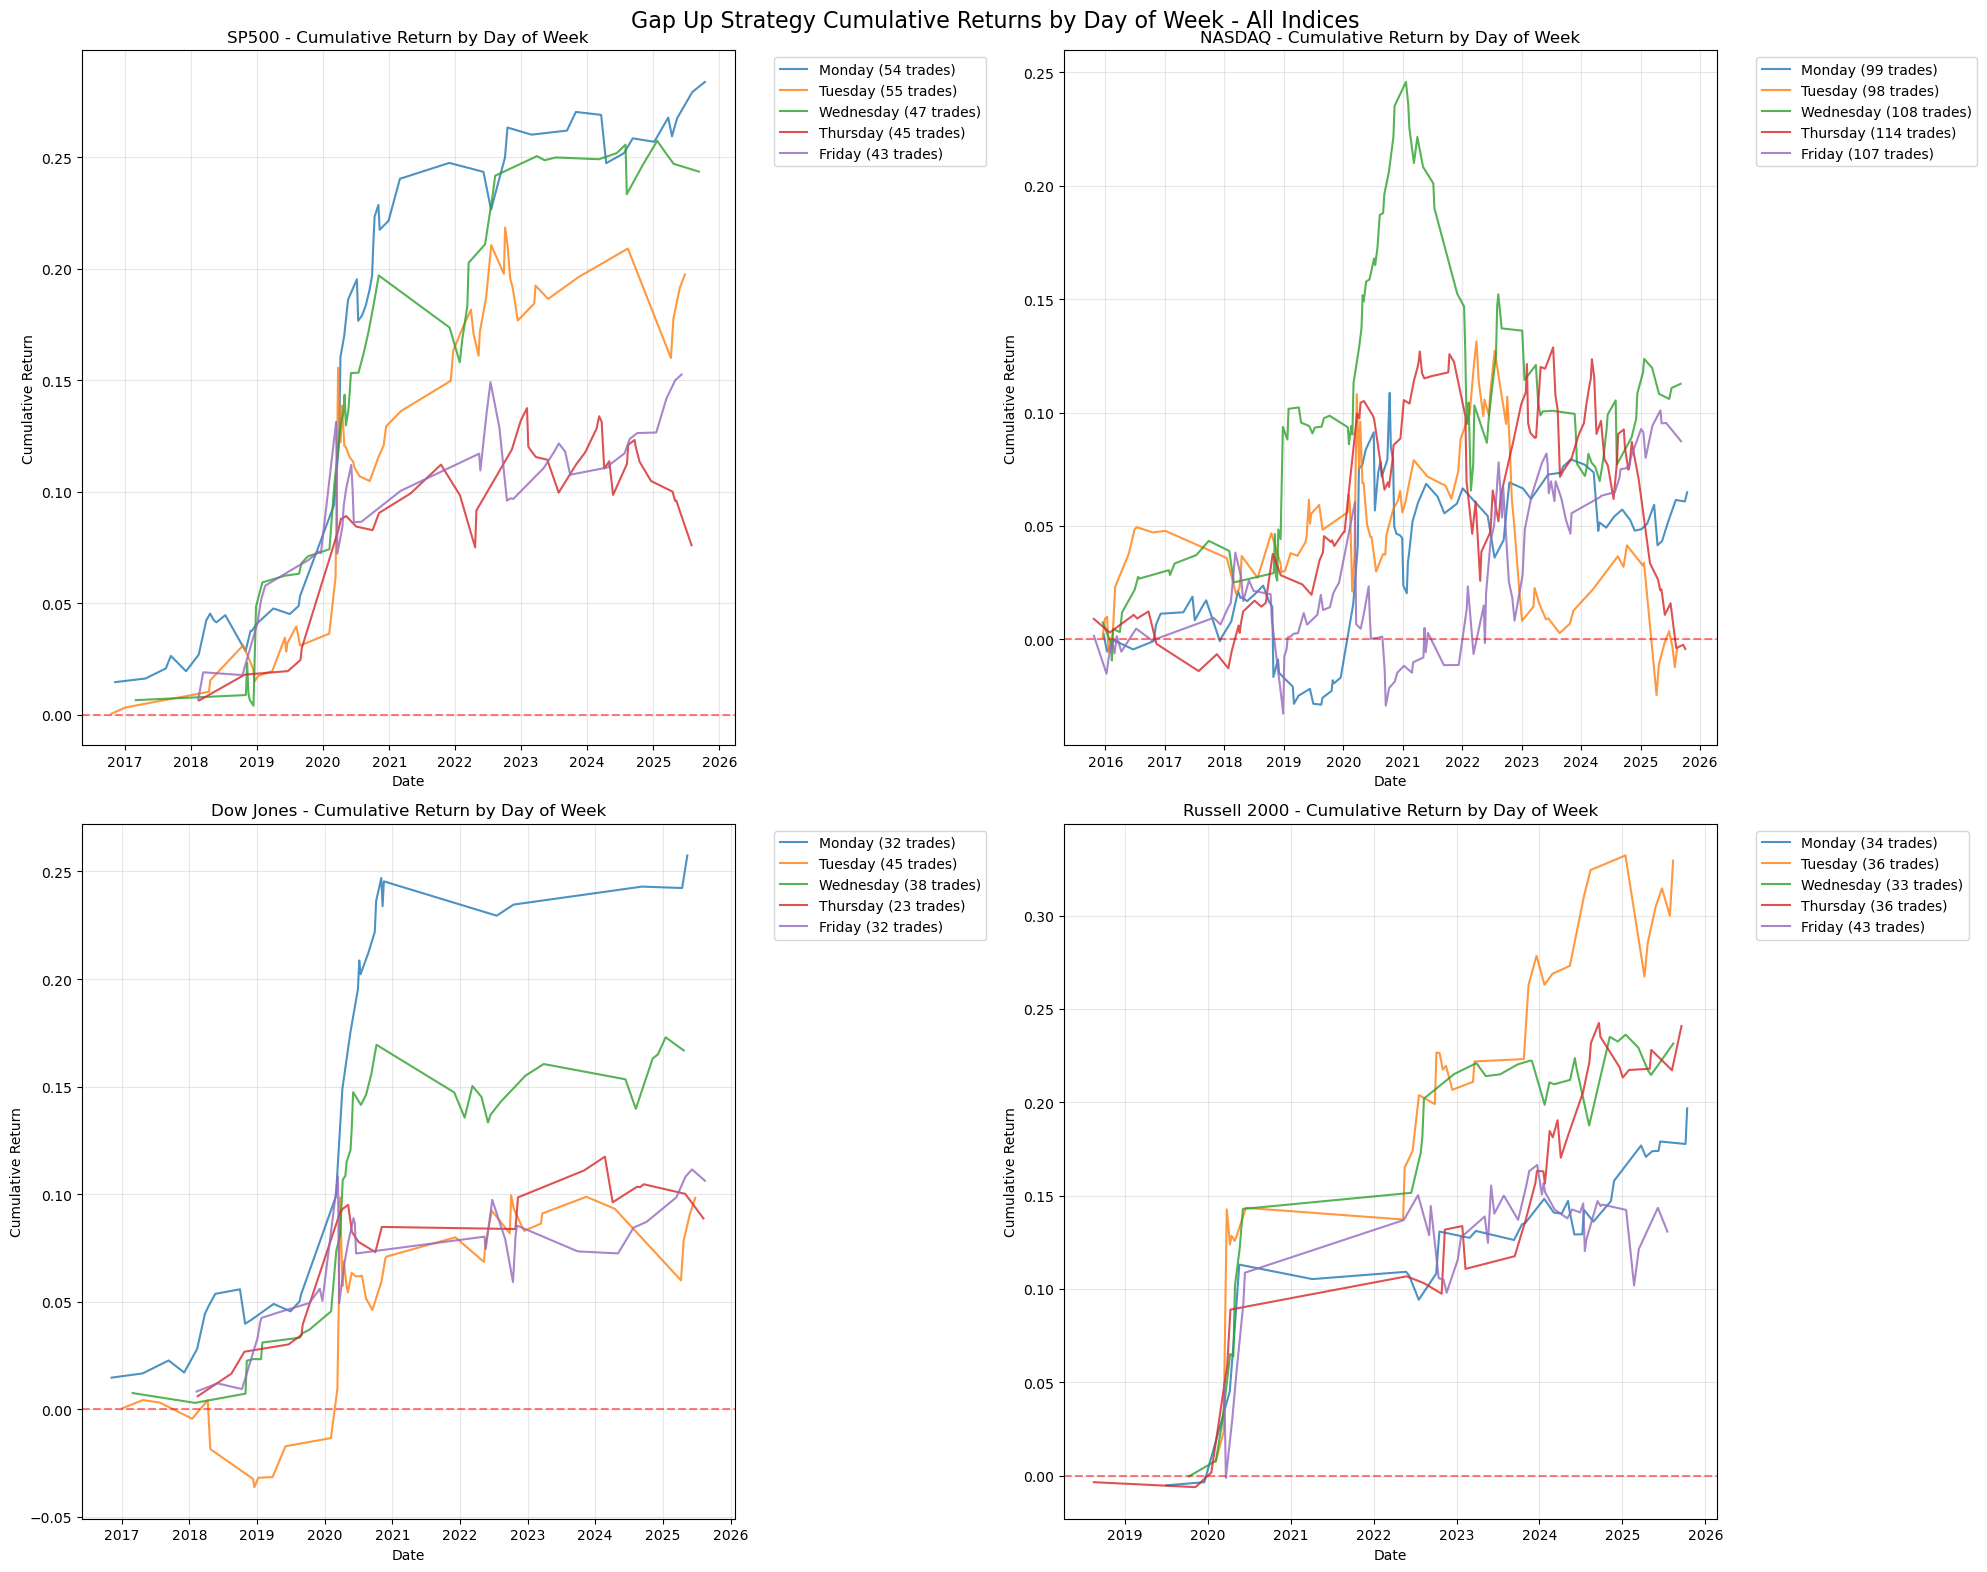

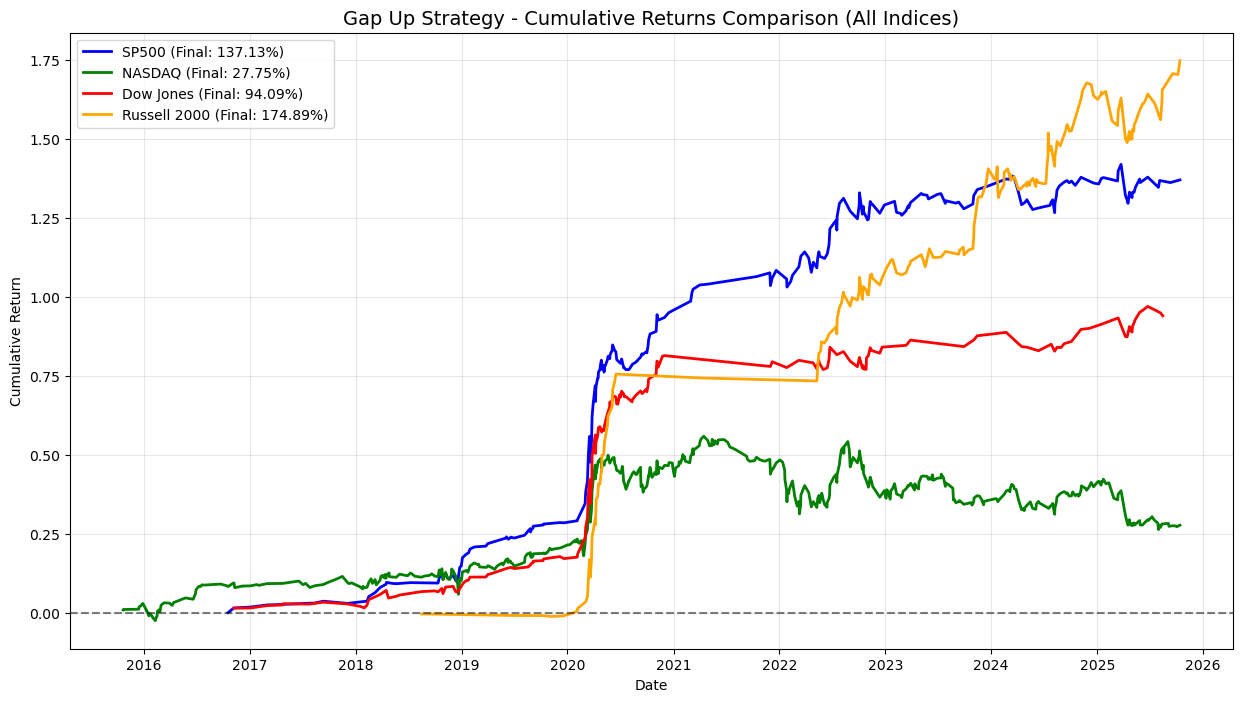

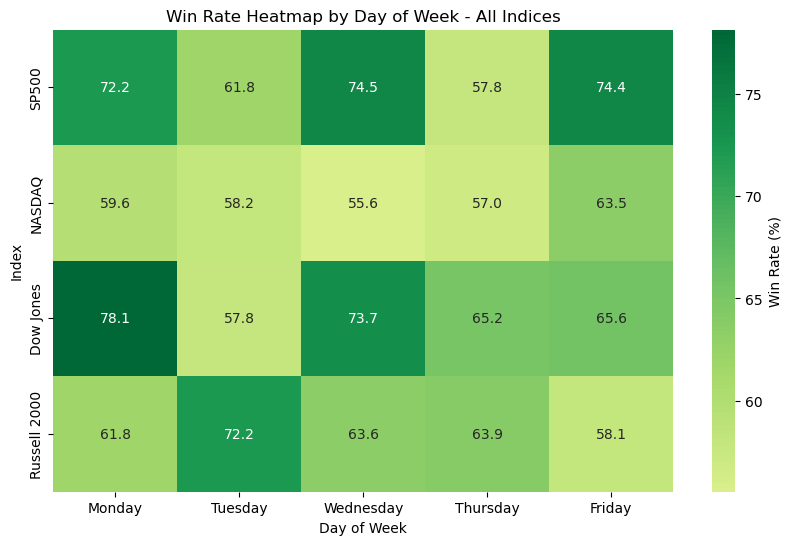

In [17]:
import seaborn as sns

# Cumulative return plots for all indices
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = ['blue', 'green', 'red', 'orange']
index_names = ['SP500', 'NASDAQ', 'Dow Jones', 'Russell 2000']

for i, (name, data) in enumerate(indices.items()):
    # Filter for gap up days
    gap_up_days_index = data[data['gap_label'] == 1].copy()
    
    if not gap_up_days_index.empty:
        # Calculate intraday return
        gap_up_days_index['intraday_return'] = ((gap_up_days_index['close'] - gap_up_days_index['open']) / gap_up_days_index['open']) * 100
        
        # Plot cumulative return for each day of the week
        for day in range(5):  # Monday to Friday
            day_data = gap_up_days_index[gap_up_days_index['day_of_week'] == day]
            if not day_data.empty:
                day_cumulative = (1 + day_data['intraday_return'] / 100).cumprod() - 1
                axes[i].plot(day_data.index, day_cumulative, 
                           label=f'{day_names[day]} ({len(day_data)} trades)', 
                           linewidth=1.5, alpha=0.8)
        
        axes[i].set_title(f'{index_names[i]} - Cumulative Return by Day of Week')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Cumulative Return')
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].grid(True, alpha=0.3)
        axes[i].axhline(0, color='red', linestyle='--', alpha=0.5)

plt.suptitle("Gap Up Strategy Cumulative Returns by Day of Week - All Indices", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Overall cumulative comparison across all indices
plt.figure(figsize=(15, 8))

for i, (name, data) in enumerate(indices.items()):
    gap_up_days_index = data[data['gap_label'] == 1].copy()
    
    if not gap_up_days_index.empty:
        gap_up_days_index['intraday_return'] = ((gap_up_days_index['close'] - gap_up_days_index['open']) / gap_up_days_index['open']) * 100
        cumulative_return = (1 + gap_up_days_index['intraday_return'] / 100).cumprod() - 1
        
        plt.plot(gap_up_days_index.index, cumulative_return, 
                label=f'{index_names[i]} (Final: {cumulative_return.iloc[-1]:.2%})', 
                linewidth=2, color=colors[i])

plt.title("Gap Up Strategy - Cumulative Returns Comparison (All Indices)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.show()

# Win rate comparison heatmap
win_rate_data = []
for name, data in indices.items():
    if name in all_results:
        win_rates = all_results[name]['win_rates']
        win_rate_data.append([win_rates.get(day, 0) for day in day_names[:5]])  # Monday to Friday only

win_rate_df = pd.DataFrame(win_rate_data, 
                          index=index_names, 
                          columns=day_names[:5])

plt.figure(figsize=(10, 6))
sns.heatmap(win_rate_df, annot=True, cmap='RdYlGn', center=50, 
            fmt='.1f', cbar_kws={'label': 'Win Rate (%)'})
plt.title("Win Rate Heatmap by Day of Week - All Indices")
plt.xlabel("Day of Week")
plt.ylabel("Index")
plt.show()

In [ ]:
"""
add here cumulative return plots for all indices
"""

'\nadd here cumulative return plots for all indices\n'

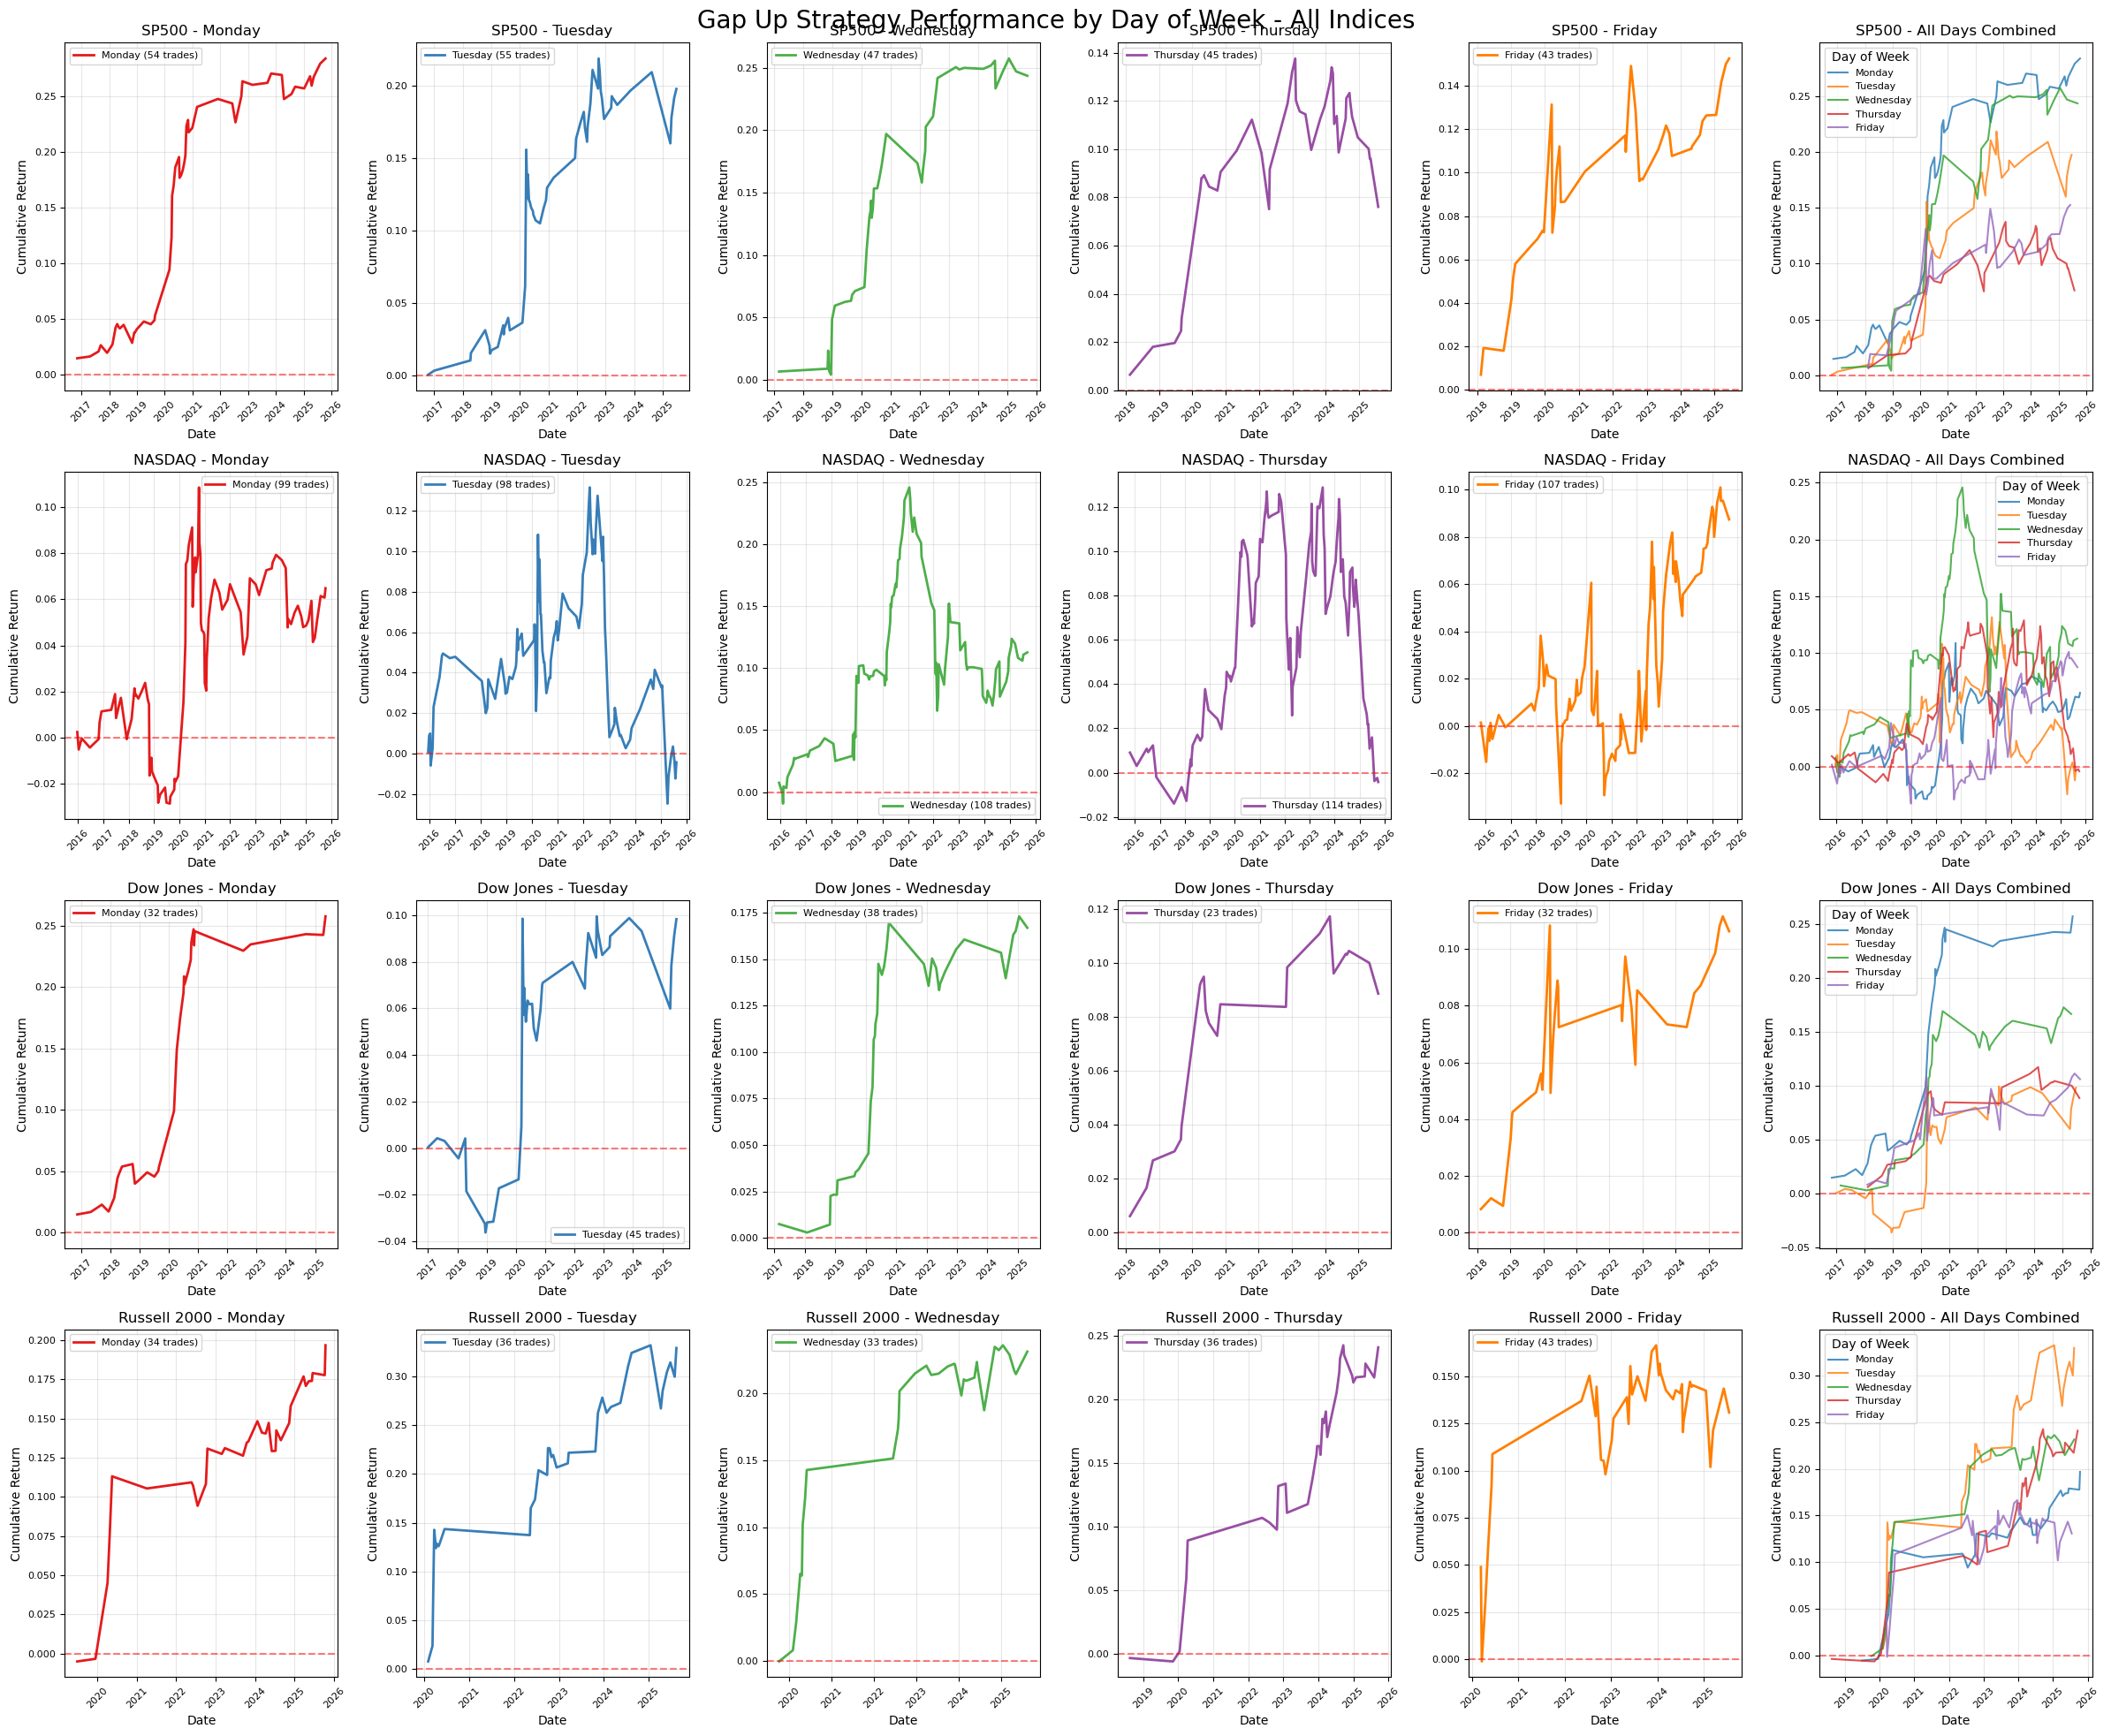


DETAILED PERFORMANCE BY INDEX AND DAY OF WEEK
       Index       Day  Trades  Avg_Return_%  Total_Return_%  Win_Rate_%  Best_Return_%  Worst_Return_%  Std_Dev_%
       SP500    Monday      54        0.4690           25.32       72.22         3.8984         -1.7059     1.0408
       SP500   Tuesday      55        0.3377           18.58       61.82         4.3887         -4.0589     1.3926
       SP500 Wednesday      47        0.4709           22.13       74.47         4.4255         -1.9505     1.1109
       SP500  Thursday      45        0.1702            7.66       57.78         5.1485         -2.1276     1.2102
       SP500    Friday      43        0.3422           14.71       74.42         5.4876         -5.2230     1.5185
      NASDAQ    Monday      99        0.0691            6.84       59.60         3.3037         -3.1601     1.0659
      NASDAQ   Tuesday      98        0.0052            0.51       58.16         3.7158         -5.6432     1.3797
      NASDAQ Wednesday     108   

In [18]:
# Comprehensive day-of-week analysis for each index (similar to cell 13 structure)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
index_names = ['SP500', 'NASDAQ', 'Dow Jones', 'Russell 2000']

# Create a large figure with subplots for each index
fig = plt.figure(figsize=(24, 20))

# Counter for subplot positioning
subplot_counter = 1

for idx, (name, data) in enumerate(indices.items()):
    # Filter for gap up days for this index
    gap_up_days_index = data[data['gap_label'] == 1].copy()
    
    if not gap_up_days_index.empty:
        # Calculate intraday return
        gap_up_days_index['intraday_return'] = ((gap_up_days_index['close'] - gap_up_days_index['open']) / gap_up_days_index['open']) * 100
        
        # Create 2x3 subplots for each index (5 weekdays + 1 combined)
        for day in range(6):  # 0-4 for weekdays, 5 for combined
            ax = plt.subplot(4, 6, subplot_counter)
            
            if day < 5:  # Individual weekdays
                day_data = gap_up_days_index[gap_up_days_index['day_of_week'] == day]
                if not day_data.empty:
                    # Calculate separate cumulative return for this day only
                    day_cumulative = (1 + day_data['intraday_return'] / 100).cumprod() - 1
                    
                    ax.plot(day_data.index, day_cumulative, 
                           label=f'{day_names[day]} ({len(day_data)} trades)', 
                           linewidth=2, color=plt.cm.Set1(day))
                    ax.set_title(f'{index_names[idx]} - {day_names[day]}')
                    ax.set_xlabel('Date')
                    ax.set_ylabel('Cumulative Return')
                    ax.legend(fontsize=8)
                    ax.grid(True, alpha=0.3)
                    ax.axhline(0, color='red', linestyle='--', alpha=0.5)
                    
                    # Format x-axis for better readability
                    ax.tick_params(axis='x', rotation=45, labelsize=8)
                    ax.tick_params(axis='y', labelsize=8)
                else:
                    ax.text(0.5, 0.5, f'No {day_names[day]}\ngap-up days', 
                           ha='center', va='center', transform=ax.transAxes)
                    ax.set_title(f'{index_names[idx]} - {day_names[day]}')
            
            else:  # Combined plot (day == 5)
                ax.set_title(f'{index_names[idx]} - All Days Combined')
                for weekday in range(5):  # Monday to Friday
                    day_data = gap_up_days_index[gap_up_days_index['day_of_week'] == weekday]
                    if not day_data.empty:
                        day_cumulative = (1 + day_data['intraday_return'] / 100).cumprod() - 1
                        ax.plot(day_data.index, day_cumulative, 
                               label=f'{day_names[weekday]}', linewidth=1.5, alpha=0.8)
                
                ax.set_xlabel('Date')
                ax.set_ylabel('Cumulative Return')
                ax.legend(title="Day of Week", fontsize=8)
                ax.grid(True, alpha=0.3)
                ax.axhline(0, color='red', linestyle='--', alpha=0.5)
                ax.tick_params(axis='x', rotation=45, labelsize=8)
                ax.tick_params(axis='y', labelsize=8)
            
            subplot_counter += 1

plt.suptitle("Gap Up Strategy Performance by Day of Week - All Indices", fontsize=20, y=0.98)
plt.tight_layout()
plt.show()

# Summary statistics table for each index and day combination
print("\n" + "=" * 120)
print("DETAILED PERFORMANCE BY INDEX AND DAY OF WEEK")
print("=" * 120)

summary_table = []
for name, data in indices.items():
    gap_up_days_index = data[data['gap_label'] == 1].copy()
    
    if not gap_up_days_index.empty:
        gap_up_days_index['intraday_return'] = ((gap_up_days_index['close'] - gap_up_days_index['open']) / gap_up_days_index['open']) * 100
        
        for day in range(5):  # Monday to Friday
            day_data = gap_up_days_index[gap_up_days_index['day_of_week'] == day]
            if not day_data.empty:
                day_stats = {
                    'Index': name,
                    'Day': day_names[day],
                    'Trades': len(day_data),
                    'Avg_Return_%': round(day_data['intraday_return'].mean(), 4),
                    'Total_Return_%': round(day_data['intraday_return'].sum(), 2),
                    'Win_Rate_%': round((day_data['intraday_return'] > 0).sum() / len(day_data) * 100, 2),
                    'Best_Return_%': round(day_data['intraday_return'].max(), 4),
                    'Worst_Return_%': round(day_data['intraday_return'].min(), 4),
                    'Std_Dev_%': round(day_data['intraday_return'].std(), 4)
                }
                summary_table.append(day_stats)

detailed_df = pd.DataFrame(summary_table)
print(detailed_df.to_string(index=False))

# Find best performing day-index combinations
print(f"\n🏆 BEST PERFORMING COMBINATIONS:")
print("-" * 60)
best_avg = detailed_df.loc[detailed_df['Avg_Return_%'].idxmax()]
best_total = detailed_df.loc[detailed_df['Total_Return_%'].idxmax()]
best_winrate = detailed_df.loc[detailed_df['Win_Rate_%'].idxmax()]
most_trades = detailed_df.loc[detailed_df['Trades'].idxmax()]

print(f"Best Average Return: {best_avg['Index']} on {best_avg['Day']} ({best_avg['Avg_Return_%']}%)")
print(f"Best Total Return: {best_total['Index']} on {best_total['Day']} ({best_total['Total_Return_%']}%)")
print(f"Best Win Rate: {best_winrate['Index']} on {best_winrate['Day']} ({best_winrate['Win_Rate_%']}%)")
print(f"Most Trading Opportunities: {most_trades['Index']} on {most_trades['Day']} ({most_trades['Trades']} trades)")